# Introduction

The purpose of this project is to find the optimal allocations given my current financial portfolio and assuming long positions only. This is a simple project meant to demonstrate understanding of basic financial concepts. This is for educational purposes only and not financial advice.

I will be using the book <i>Python for Finance</i> by Yves Hilpisch as a rough guide for my analysis. However, changes will be made due to using a simplified version of my own portfolio and updated code.

In [6]:
### Import libraries
import numpy as np
import pandas as pd
import datetime as dt
from pandas_datareader import data as pdr
import yfinance as yf
import math
yf.pdr_override()

In [7]:
stocks = ['NVDA', 'AAPL', 'QYLD', '^GSPC']

In [8]:
# get stock data
stocks_df = pdr.get_data_yahoo(stocks, start='2021-01-01', end='2023-12-08')[['Adj Close']]
stocks_df.columns = stocks_df.columns.droplevel(0)

[*********************100%%**********************]  4 of 4 completed


### Exploratory Analysis

In [9]:
for stock in stocks_df.columns:
    stocks_df[stock + "_LogRet"] = np.log(stocks_df[stock] / stocks_df[stock].shift(1))
    stocks_df[stock + '_Volatility'] = stocks_df[stock + '_LogRet'].rolling(252).std()

In [10]:
vols = [vol_col for vol_col in stocks_df.columns if '_Vol' in vol_col]

<Axes: xlabel='Date'>

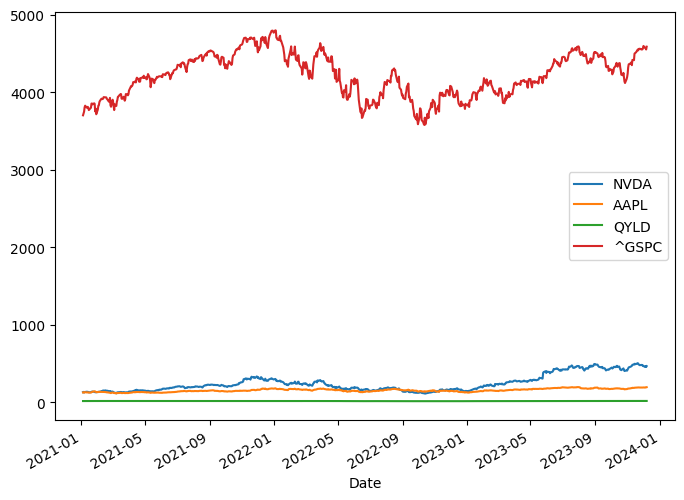

In [11]:
stocks_df[stocks].plot(figsize=(8,6))

array([<Axes: xlabel='Date'>, <Axes: xlabel='Date'>,
       <Axes: xlabel='Date'>, <Axes: xlabel='Date'>], dtype=object)

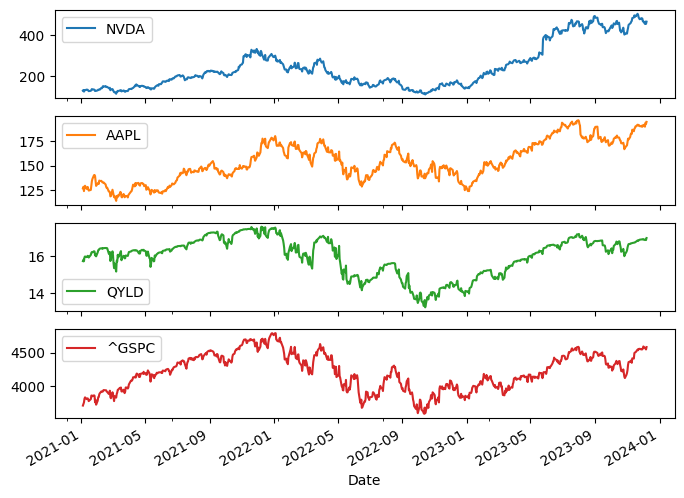

In [12]:
stocks_df[stocks].plot(subplots=True,figsize=(8,6))

<Axes: xlabel='Date'>

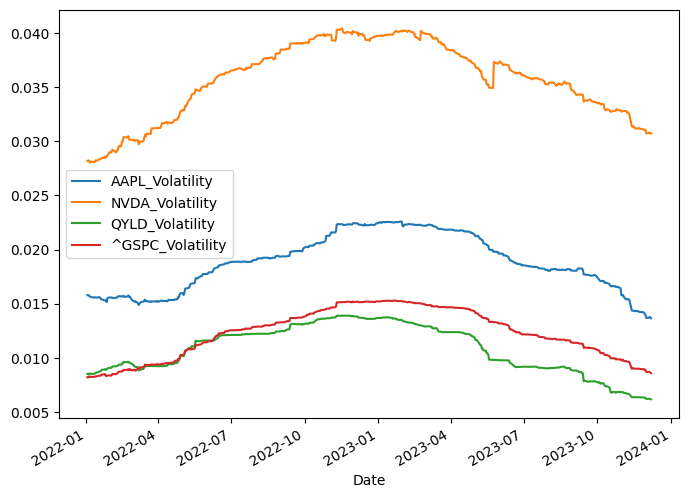

In [13]:
stocks_df[vols].plot(figsize=(8,6))

array([<Axes: xlabel='Date'>, <Axes: xlabel='Date'>,
       <Axes: xlabel='Date'>, <Axes: xlabel='Date'>], dtype=object)

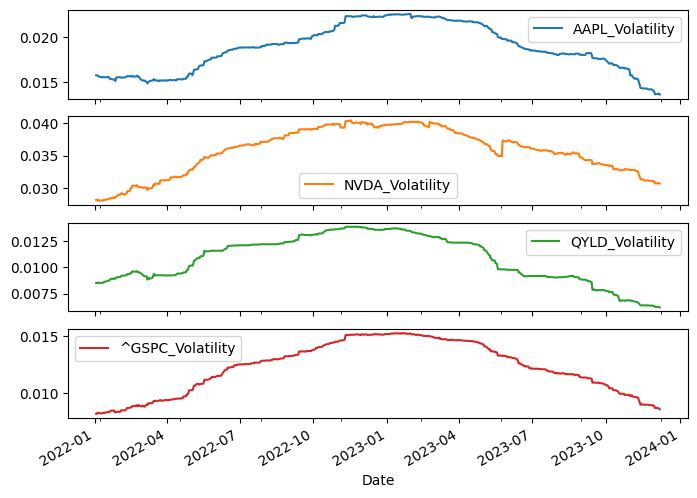

In [14]:
stocks_df[vols].plot(subplots=True,figsize=(8,6))

In [15]:
# # rolling avgs
# nvda['42d'] = np.round(nvda['Close'].rolling(42).mean(), 2)
# nvda['252d'] = np.round(nvda['Close'].rolling(252).mean(), 2)

# nvda[['Close', '42d', '252d']].tail()

In [16]:
# # rolling avgs fro a smaller window (42 days) and a larger window (252 days)
# nvda[['Close', '42d', '252d']].plot(grid=True, figsize=(8, 5))

In [17]:
for stock in stocks:    
    stocks_df[stock + '_Return'] = np.log(stocks_df[stock] / stocks_df[stock].shift(1))

In [18]:
rets = [ret for ret in stocks_df.columns if '_Ret' in ret]

<Axes: xlabel='Date'>

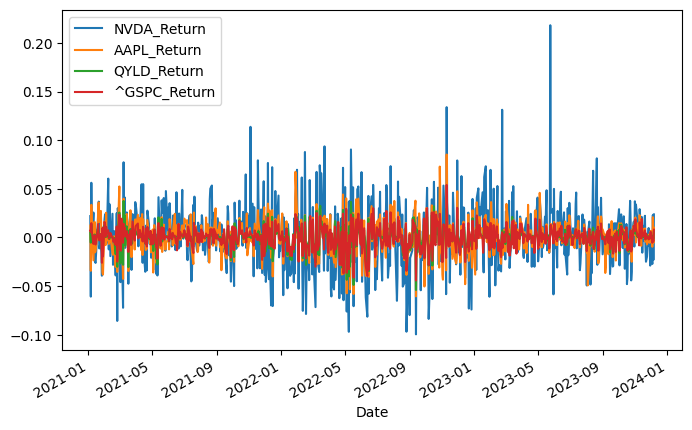

In [19]:
stocks_df[rets].plot(figsize=(8, 5))

array([<Axes: xlabel='Date'>, <Axes: xlabel='Date'>,
       <Axes: xlabel='Date'>, <Axes: xlabel='Date'>], dtype=object)

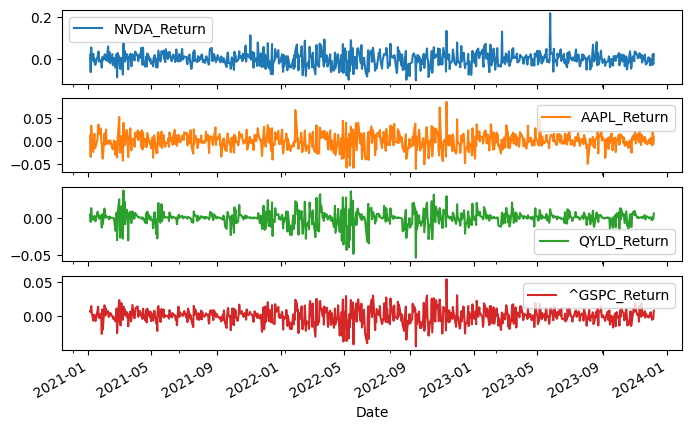

In [20]:
stocks_df[rets].plot(subplots=True, figsize=(8, 5))

In [24]:
# moving volatility

for stock in stocks:
    stocks_df[stock + '_Mov_Vol'] = stocks_df[stock + '_Return'].rolling(252).std() * math.sqrt(252)

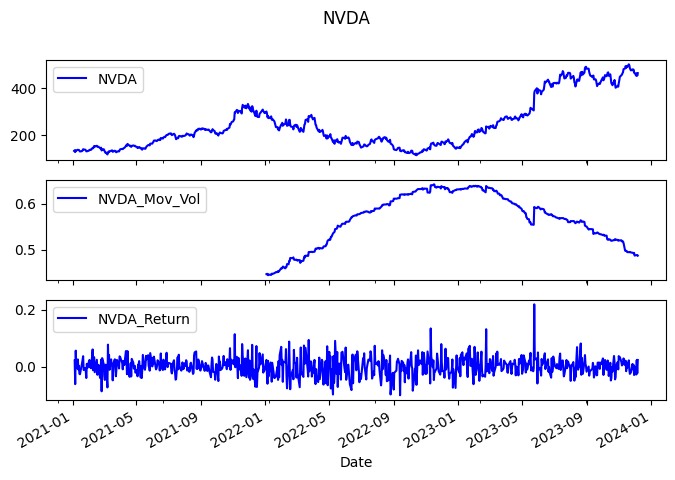

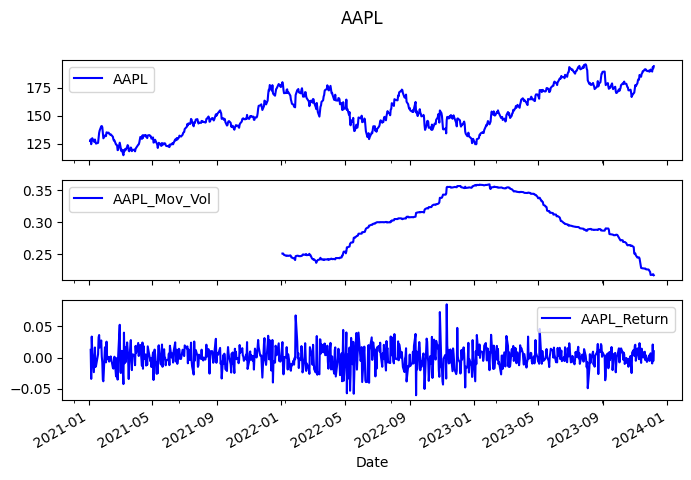

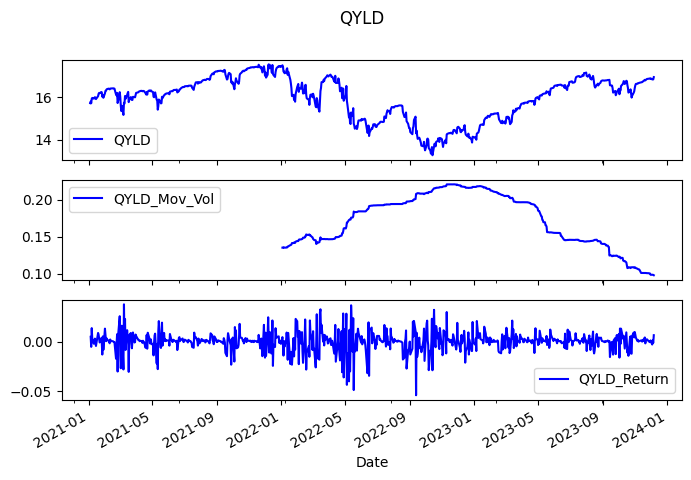

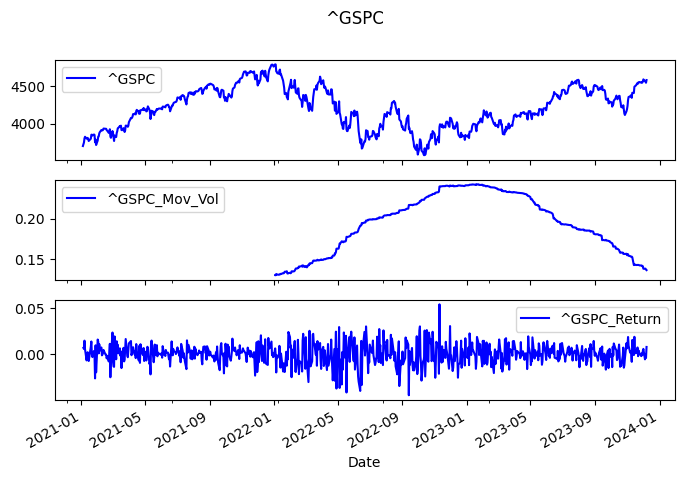

In [25]:
# nvda[['Close', 'Mov_Vol', 'Return']].plot(subplots=True, style='b', figsize=(8,5))
for stock in stocks:
    stocks_df[[stock, stock + '_Mov_Vol', stock + '_Return']].plot(subplots=True, style='b', figsize=(8,5), title=stock)


##### Editing Notes
- linear regression models
- portfolio optimization

# Bibliography
Hilpisch, Yves. <i>Python for Finance</i>. O'Reilly Media, Inc. December 2014.

###